In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.external as sce
import seaborn as sns
from matplotlib.pyplot import rc_context


In [2]:
import scipy.stats
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import weibull_min
from scipy.stats import weibull_max
from scipy.stats import pearsonr


In [4]:
exp100=sc.read('exp100.h5',gex_only=False)
exp105=sc.read('exp105.h5',gex_only=False)
exp106=sc.read('exp106.h5',gex_only=False)


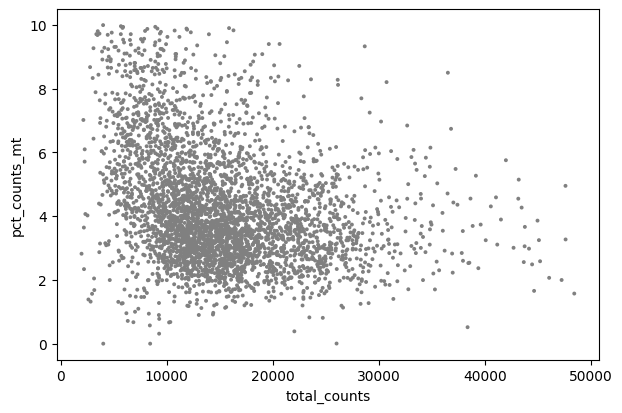

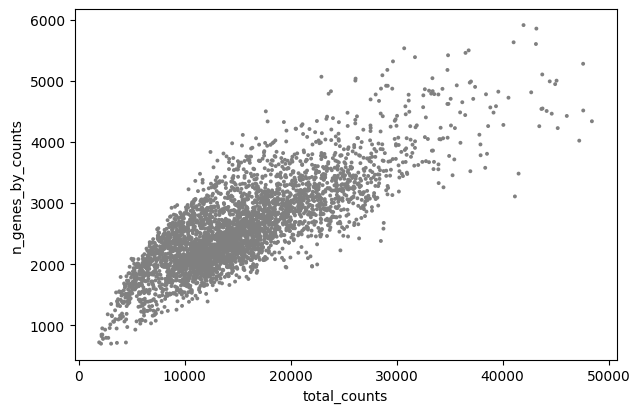

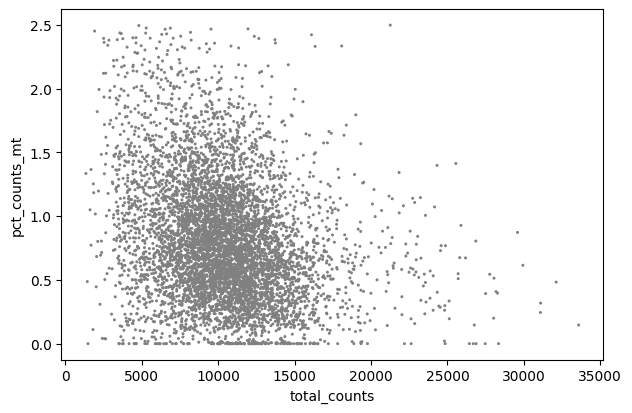

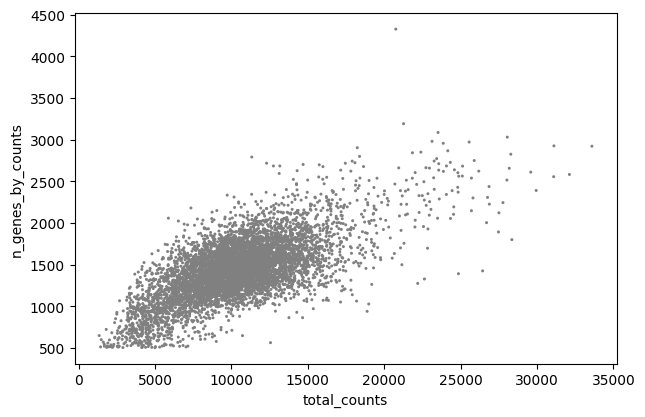

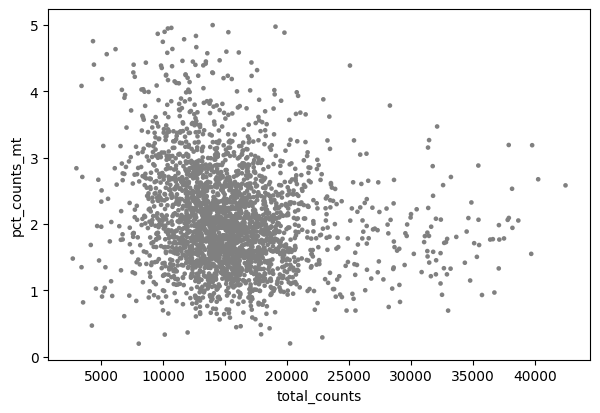

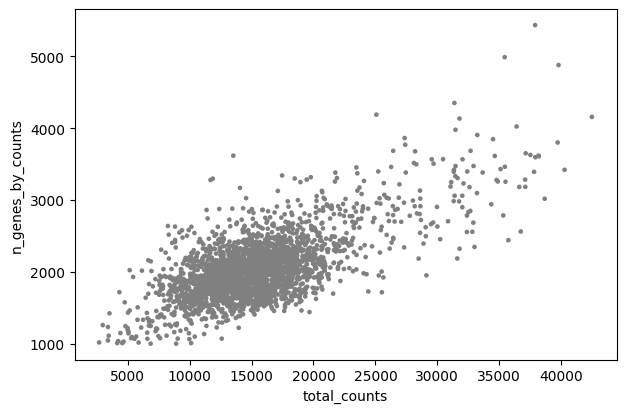

In [5]:
sc.pl.scatter(exp100, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp100, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(exp105, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp105, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(exp106, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp106, x='total_counts', y='n_genes_by_counts')

In [7]:
data = exp100.concatenate(exp105, exp106, batch_key='sample')



/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from 

In [51]:
data.write('3data_raw.h5')


In [8]:
data1=data.copy() 

In [9]:
d0=data1[data1.obs['sample']=='0']
d1=data1[data1.obs['sample']=='1']
d2=data1[data1.obs['sample']=='2']

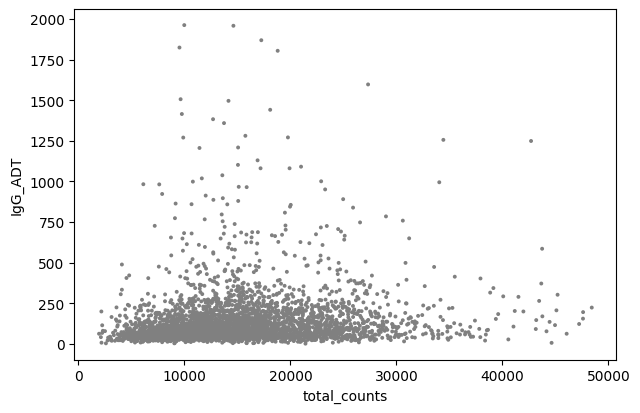

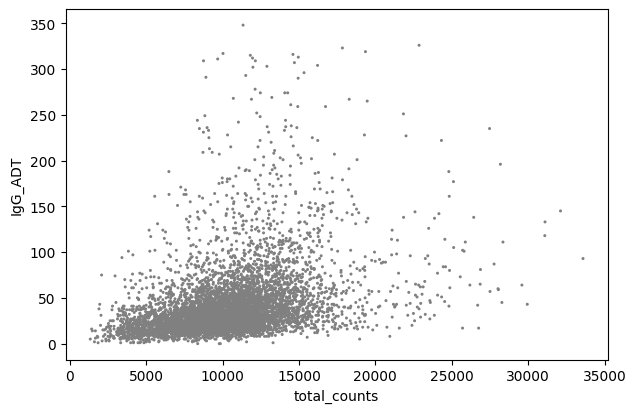

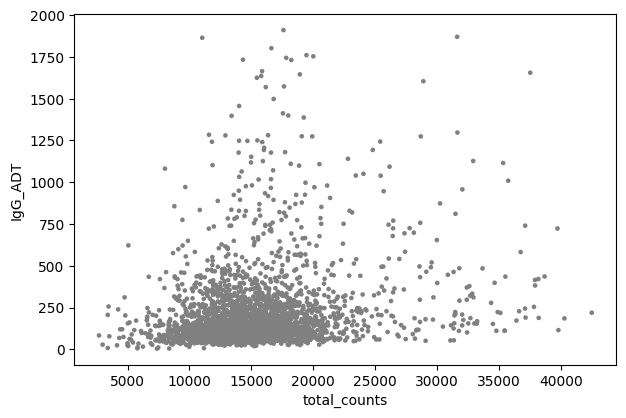

In [10]:
sc.pl.scatter(d0, x='total_counts', y='IgG_ADT')
sc.pl.scatter(d1, x='total_counts', y='IgG_ADT')
sc.pl.scatter(d2, x='total_counts', y='IgG_ADT')




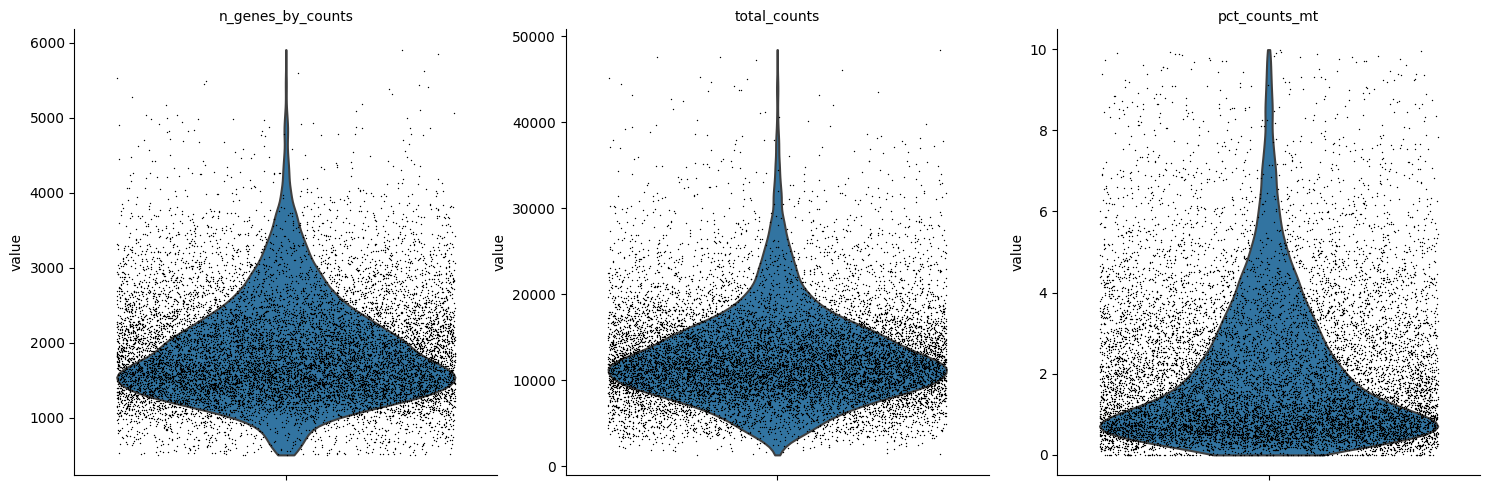

In [11]:
sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [16]:
rna=data[:, data.var["feature_types"] == "Gene Expression"].copy()

In [17]:
adt=data[:, data.var["feature_types"] == "Antibody Capture"].copy()

In [18]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)

In [19]:
sc.pp.pca(rna)
sc.external.pp.bbknn(rna, batch_key='sample')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


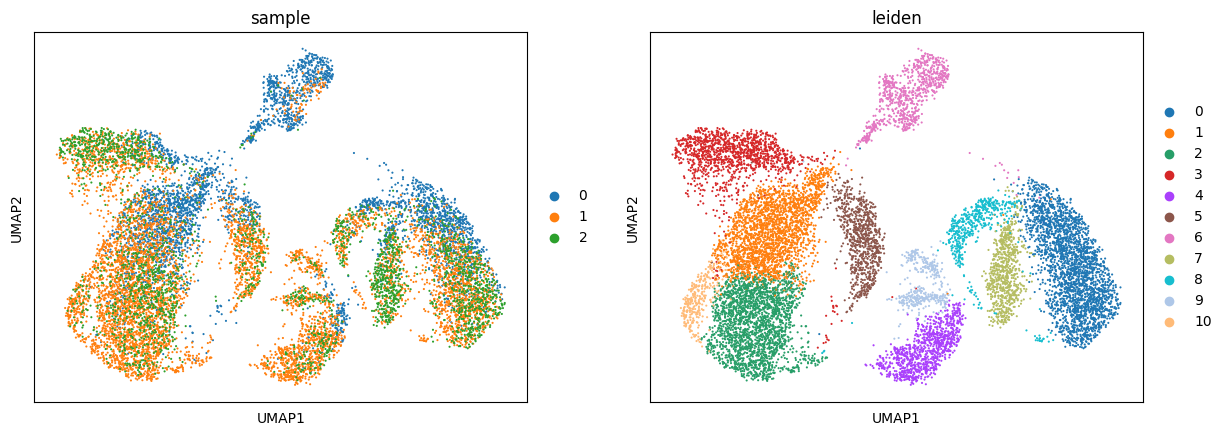

In [20]:
sc.tl.umap(rna)
sc.tl.leiden(rna,resolution = 0.7)
sc.pl.umap(rna, color=['sample','leiden'])

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


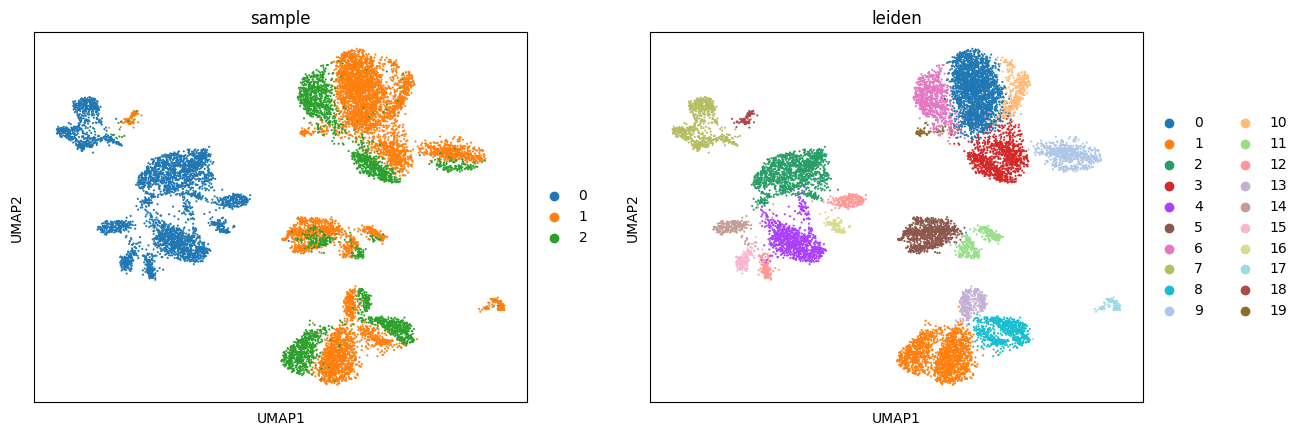

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


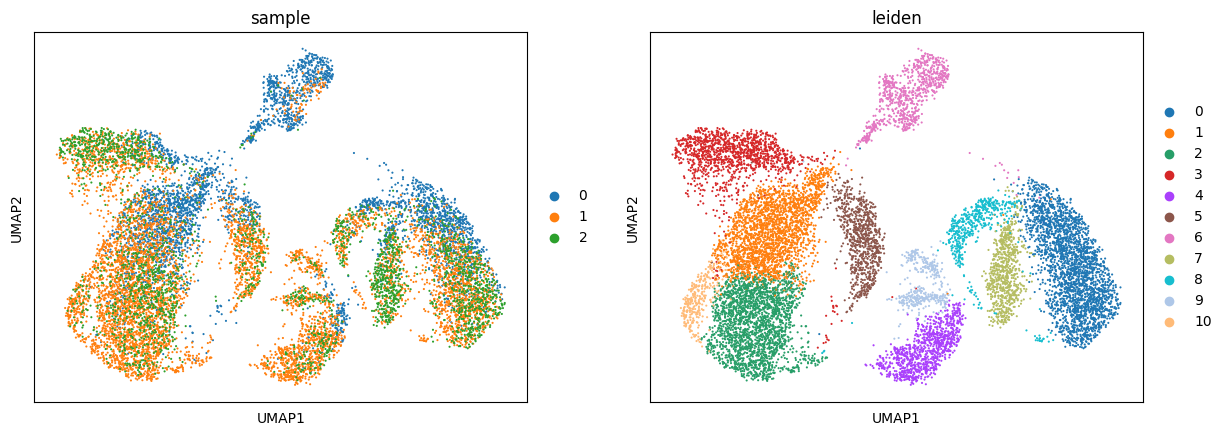

In [21]:
nb=data[:, data.var["feature_types"] == "Gene Expression"].copy()
sc.pp.normalize_total(nb)
sc.pp.log1p(nb)
sc.pp.pca(nb)
sc.pp.neighbors(nb, n_neighbors=20)   
sc.tl.umap(nb)
sc.tl.leiden(nb,resolution = 0.7, key_added="leiden")
sc.pl.umap(nb, color=['sample','leiden'])
sc.pl.umap(rna, color=['sample','leiden'])

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


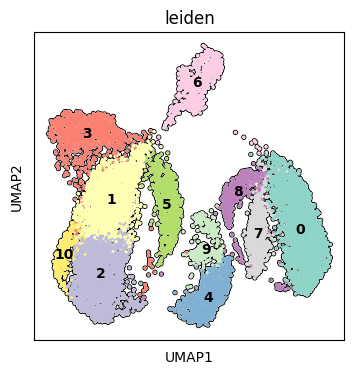

In [22]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(rna, color=["leiden"], size=20,alpha=1,legend_loc="on data", 
               add_outline=True,palette='Set3', show=False)
#     sc.pl.umap(rna, color=['sample'], size=20,)
plt.savefig('leiden.pdf')



/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


NameError: name 's1' is not defined

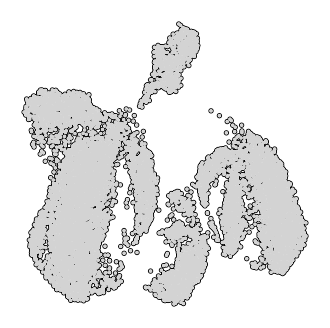

In [23]:
with rc_context({'figure.figsize': (4, 4)}):
    ax=sc.pl.umap(rna, size=20,alpha=1, 
               add_outline=True,frameon=False, show=False)
    sc.pl.umap(s1, color=['sample'], size=15,ax=ax,frameon=False, 
               palette={"0":"b","1":"k","2":"green"},show=False,legend_loc='None',alpha=0.7)

    ax.set_title('')   


In [ ]:
with rc_context({'figure.figsize': (4, 4)}):
#     sc.pl.umap(rna, color=["IGHD",'MS4A1','CD19','MKI67'], size=15, cmap='Purples')
#     sc.pl.umap(rna, color=["IGHM",'IGHA1','IGHA2','IGHE'], size=15, cmap='Purples')
    sc.pl.umap(rna, color=["IGHG1",'IGHG2','IGHG3','IGHG4'], size=15, cmap='Purples')
#     sc.pl.umap(rna, color=["IGKC",'IGLC1','IGLC2','IGLC3'], size=15, cmap='Purples')
#     sc.pl.umap(rna, color=['IRF4','PRDM1','XBP1','JCHAIN'], size=15, cmap='Purples')
#     sc.pl.umap(rna, color=["SDC1",'CD38','CD27','PECAM1'], size=15, cmap='Purples')




In [ ]:
rna

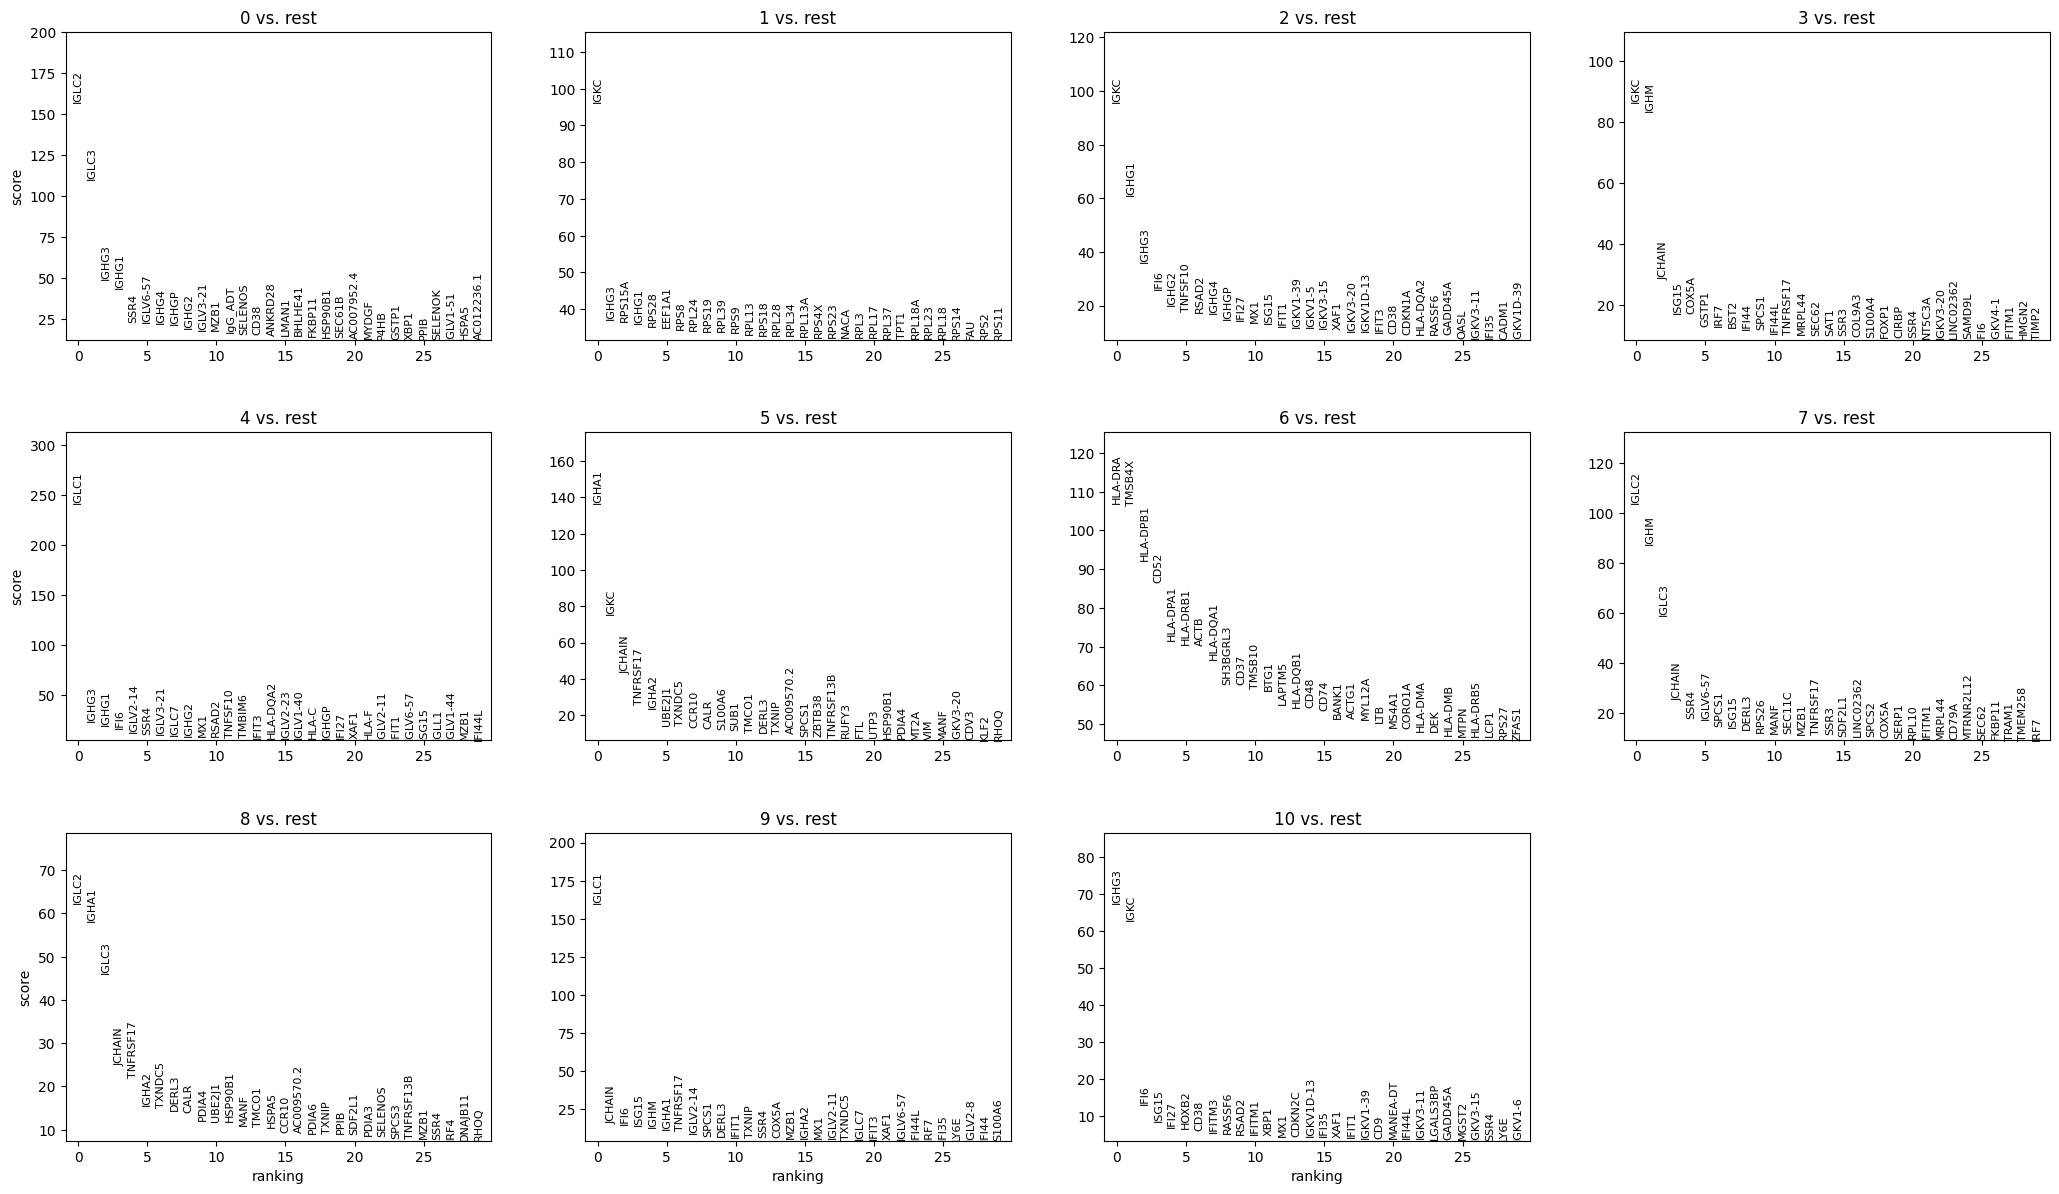

In [56]:
rna_t=sc.tl.rank_genes_groups(rna, 'leiden', method='t-test')
# with rc_context({'figure.figsize': (10, 12)}):

sc.pl.rank_genes_groups(rna, n_genes=30, sharey=False)

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


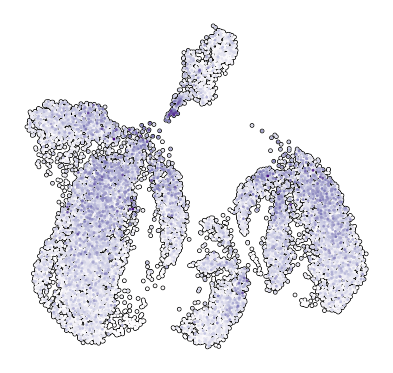

In [251]:
with rc_context({'figure.figsize': (4.2, 4)}):

#     ax = sc.pl.umap(rna, size=50, show=False)
    ax=sc.pl.umap(rna,color=['MIF'], legend_loc='none',size=15,show=False, alpha=1,
                    add_outline=True,frameon=False, cmap='Purples',colorbar_loc=None,vmin=1.5,
                   )
    ax.set_title('')   
plt.show()

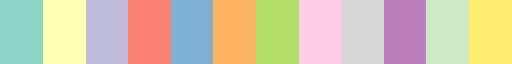

In [1344]:
mpl.colormaps['Set3']

In [28]:
from matplotlib import cm
cmap=cm.get_cmap("Set3").colors

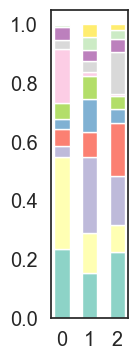

sample         0         1         2
leiden                              
0       0.236177  0.153594  0.224916
1       0.311743  0.136909  0.092876
2       0.037651  0.256042  0.166356
3       0.058452  0.086855  0.178292
4       0.032912  0.111648  0.048489
5       0.055029  0.078902  0.045132
6       0.185097  0.014034  0.005222
7       0.031332  0.037892  0.145095
8       0.042391  0.038360  0.044013
9       0.006846  0.043817  0.029467
10      0.002370  0.041946  0.020142

In [30]:
d=rna.obs
dd=d.groupby('sample')['leiden'].value_counts(normalize=True).unstack('sample')
# al=d['leiden'].value_counts(normalize=True)
# dd['all']= al

labels = dd.columns
c0= dd.iloc[0]
c1 =  dd.iloc[1]
c2 = dd.iloc[2]
c3 = dd.iloc[3]
c4 = dd.iloc[4]
c5 = dd.iloc[5]
c6 = dd.iloc[6]
c7 = dd.iloc[7]
c8 = dd.iloc[8]
c9 = dd.iloc[9]
c10 = dd.iloc[10]

fig = plt.figure(figsize=(1,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, c0, width,color=cmap[0],alpha=1)
ax.bar(labels, c1, width, bottom=c0,color=cmap[1],alpha=1,)
ax.bar(labels, c2, width, bottom=c0+c1,color=cmap[2],alpha=1,)
ax.bar(labels, c3, width, bottom=c0+c1+c2,color=cmap[3],alpha=1,)
ax.bar(labels, c4, width, bottom=c0+c1+c2+c3,color=cmap[4],alpha=1,)
ax.bar(labels, c5, width, bottom=c0+c1+c2+c3+c4,color=cmap[6],alpha=1,)
ax.bar(labels, c6, width, bottom=c0+c1+c2+c3+c4+c5,color=cmap[7],alpha=1,)
ax.bar(labels, c7, width, bottom=c0+c1+c2+c3+c4+c5+c6,color=cmap[8],alpha=1,)
ax.bar(labels, c8, width, bottom=c0+c1+c2+c3+c4+c5+c6+c7,color=cmap[9],alpha=1,)
ax.bar(labels, c9, width, bottom=c0+c1+c2+c3+c4+c5+c6+c7+c8,color=cmap[10],alpha=1,)
ax.bar(labels, c10, width, bottom=c0+c1+c2+c3+c4+c5+c6+c7+c8+c9,color=cmap[11],alpha=1,)



# plt.ylim(0,1.1)

# plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()

dd

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


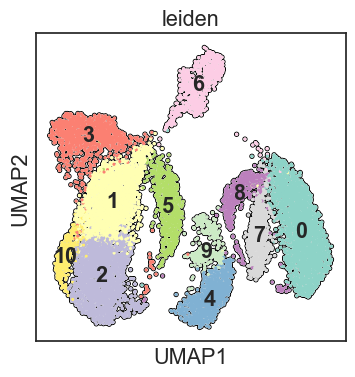

In [1045]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(rna, color=["leiden"], size=20,alpha=1,legend_loc="on data", 
               add_outline=True,palette='Set3', show=False)
#     sc.pl.umap(rna, color=['sample'], size=20,)
plt.savefig('leiden.pdf')



In [ ]:
x='IGHM'
y='IGHA1'
fig=plt.figure(figsize=(4,4))


plt.scatter(rna.obs_vector(x),rna.obs_vector(y),color='k',s=5)

plt.show()

In [37]:
#define ig catergory by ig count
M=rna[(rna.obs_vector('IGHM')> 4) & (rna.obs_vector('IGHA1') < 4.5)& (rna.obs_vector('IGHG1') < 4.5)]
A=rna[(rna.obs_vector('IGHA1') > 4.5)&(rna.obs_vector('IGHM')<4.6)&(rna.obs_vector('IGHG1')<3) ]
G1=rna[(rna.obs_vector('IGHG1') > 3)&(rna.obs_vector('IGHG2')<4)]
G3=rna[(rna.obs_vector('IGHG1') < 3)&(rna.obs_vector('IGHG3')>3.5)]
G2=rna[(rna.obs_vector('IGHG2') > 3.2)&(rna.obs_vector('IGHG3') <4.3)]
G4=rna[(rna.obs_vector('IGHG4') > 4)&(rna.obs_vector('IGHG3') <3.5)]


In [329]:
K=rna[(rna.obs_vector('IGKC')> 6.5) & (rna.obs_vector('IGLC1') < 6)& (rna.obs_vector('IGLC2') < 6)& (rna.obs_vector('IGLC3') < 6)]
L=rna[(rna.obs_vector('IGKC')< 6.5) & ((rna.obs_vector('IGLC1') > 6)|(rna.obs_vector('IGLC2') > 6)|(rna.obs_vector('IGLC3') > 6)|(rna.obs_vector('IGLC5') > 0.25)|(rna.obs_vector('IGLC6') > 0.25)|(rna.obs_vector('IGLC7') > 6))]


In [330]:
rna.obs['Ig']='x'
rna.obs['IgL']='x'
rna.obs['IgH']='x'


In [331]:


m_i=M.obs.index
a_i=A.obs.index
kap_i=K.obs.index
lam_i=L.obs.index
g1_i=G1.obs.index
g2_i=G2.obs.index
g3_i=G3.obs.index
g4_i=G4.obs.index


rna.obs.loc[m_i,'Ig'] ='M'
rna.obs.loc[a_i,'Ig'] ='A'
rna.obs.loc[g1_i,'Ig'] ='G'
rna.obs.loc[g2_i,'Ig'] = 'G'
rna.obs.loc[g3_i,'Ig'] = 'G'
rna.obs.loc[g4_i,'Ig'] = 'G'


rna.obs.loc[kap_i, 'IgL'] = 'kappa'
rna.obs.loc[lam_i, 'IgL'] = 'lambda'

rna.obs.loc[m_i, 'IgH'] = 'M'
rna.obs.loc[a_i, 'IgH'] = 'A'
rna.obs.loc[g1_i, 'IgH'] = 'G1'
rna.obs.loc[g2_i, 'IgH'] = 'G2'
rna.obs.loc[g3_i, 'IgH'] = 'G3'
rna.obs.loc[g4_i, 'IgH'] = 'G4'


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


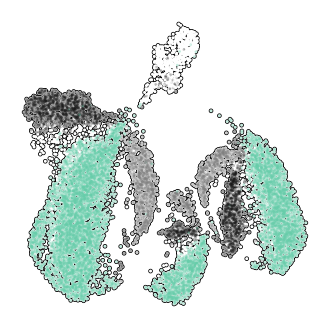

In [1063]:
with rc_context({'figure.figsize': (4, 4)}):
#     ax = sc.pl.umap(rna, size=10, add_outline=True, outline_width=(0.5, 0.05),frameon=True, show=False)
    
    ax=sc.pl.umap(rna, color=["Ig"], size=15,
               palette={'A':'grey','M':'k','G':'mediumaquamarine','x':'white'},alpha=0.4,add_outline=True,
              frameon=False,legend_loc='None', show=False)
    ax.set_title('')   
    

In [39]:
G=rna[rna.obs.Ig=='G']

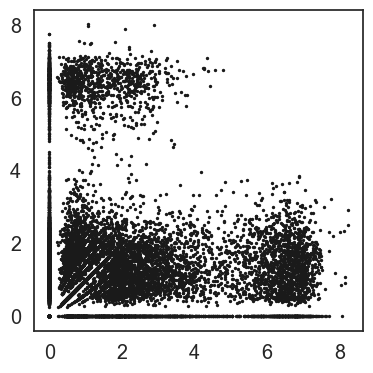

In [211]:
x='IGHM'
y='IGHA1'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),color='k',s=2)
# plt.scatter(M.obs_vector(x),M.obs_vector(y),color='k',s=2)
# plt.scatter(A.obs_vector(x),A.obs_vector(y),color='grey',s=2)
# plt.scatter(G.obs_vector(x),G.obs_vector(y),color='mediumaquamarine',s=2)

plt.show()
# plt.axvline(x=4.5,linewidth=1, c='k')
# plt.axhline(y=4.35,linewidth=1, c='k')

In [770]:
negA=rna[rna.obs_vector('IGHA1')<0.05]
negM=rna[rna.obs_vector('IGHM')<0.05]

In [776]:
negM

View of AnnData object with n_obs × n_vars = 3800 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'Ig_colors', 'IgH_colors', 'IgL_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [333]:
datar=data[data.obs.index.isin(rna.obs.index)]

sc.pp.log1p(datar)
rna.raw = datar



/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [1313]:
c6=rna[rna.obs.leiden=='6']
asc=rna[rna.obs.leiden!='6']

In [1220]:
ngcluster

View of AnnData object with n_obs × n_vars = 3755 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'Ig_colors', 'IgH_colors', 'IgL_colors', 'dendrogram_leiden', 'sec_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_3031/76048748.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(s0M.raw.obs_vector('IgG_ADT'), kde=True,
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_3031/76048748.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.

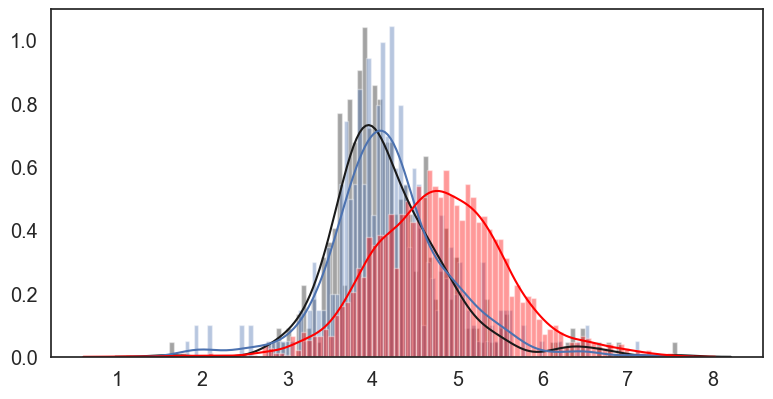

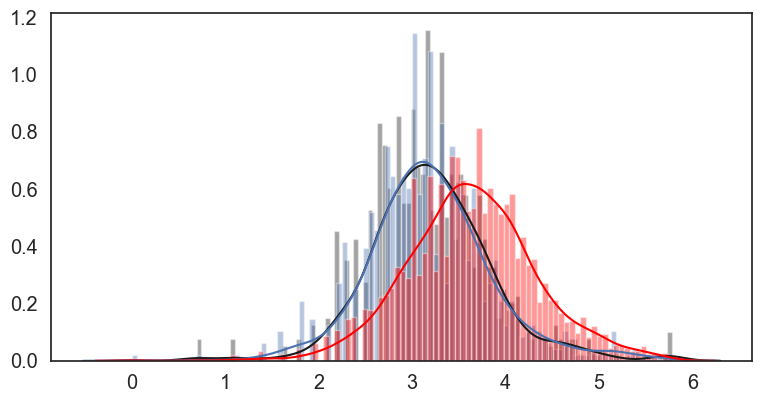

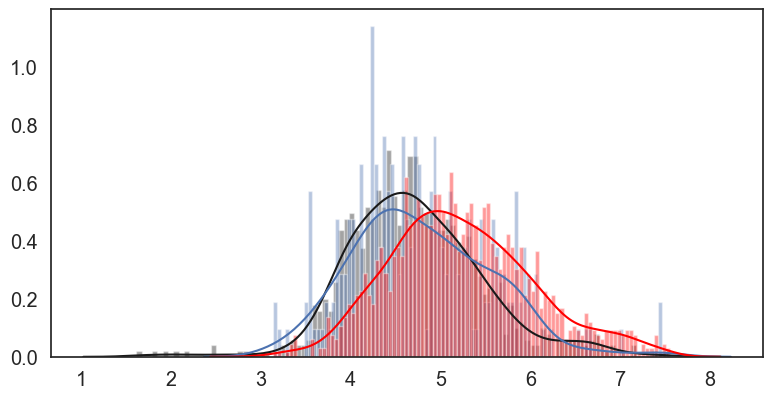

In [226]:
fig = plt.figure(figsize=(8,12))

ax = sns.set(font_scale=1.3) 
ax = sns.set_style("white")
# sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
#    color = 'slategrey',shade=True)
ax1 = fig.add_subplot(311)
s0=rna[rna.obs['sample']=='0']
s0M=s0[s0.obs.Ig=='M']
s0A=s0[s0.obs.Ig=='A']
s0G=s0[s0.obs.Ig=='G']
ax1 = sns.distplot(s0M.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'k',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s0A.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'b',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s0G.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'red',bins=100,norm_hist=True
        )#,bins=int(30))
# sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
#              color = 'purple',shade=True)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
# plt.xticks([])
# plt.yticks([])

# # plt.axvline(x=5,linewidth=1,c='purple' )
fig = plt.figure(figsize=(8,12))

ax = sns.set(font_scale=1.3) 
ax = sns.set_style("white")
# sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
#    color = 'slategrey',shade=True)
ax1 = fig.add_subplot(311)
s1=rna[rna.obs['sample']=='1']
s1M=s1[s1.obs.Ig=='M']
s1A=s1[s1.obs.Ig=='A']
s1G=s1[s1.obs.Ig=='G']
ax1 = sns.distplot(s1M.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'k',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s1A.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'b',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s1G.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'red',bins=100,norm_hist=True
        )#,bins=int(30))
# sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
#              color = 'purple',shade=True)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
# plt.xticks([])
# plt.yticks([])

# # plt.axvline(x=5,linewidth=1,c='purple' )


fig = plt.figure(figsize=(8,12))

ax = sns.set(font_scale=1.3) 
ax = sns.set_style("white")
# sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
#    color = 'slategrey',shade=True)
ax1 = fig.add_subplot(311)
s2=rna[rna.obs['sample']=='2']
s2M=s2[s2.obs.Ig=='M']
s2A=s2[s2.obs.Ig=='A']
s2G=s2[s2.obs.Ig=='G']
ax1 = sns.distplot(s2M.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'k',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s2A.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'b',bins=100,norm_hist=True
        )
ax1 = sns.distplot(s2G.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'red',bins=100,norm_hist=True
        )#,bins=int(30))
# sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
#              color = 'purple',shade=True)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
# plt.xticks([])
# plt.yticks([])

# # plt.axvline(x=5,linewidth=1,c='purple' )


plt.show()

/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_39836/2837936799.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(s0M.raw.obs_vector('IgG_ADT'), kde=True,
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_39836/2837936799.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 

(0.0, 0.8)

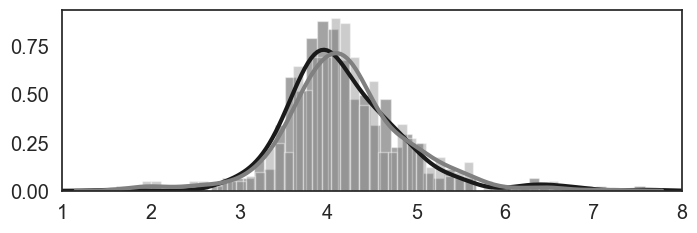

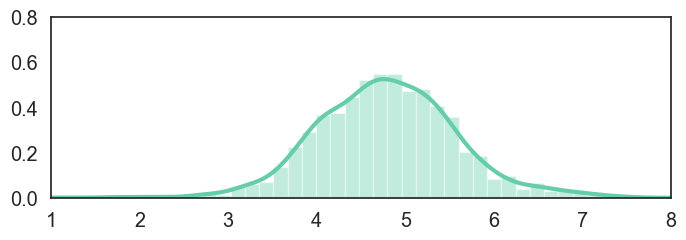

In [1089]:
fig = plt.figure(figsize=(8,8))

ax = sns.set(font_scale=1.3) 
ax = sns.set_style("white")
# sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
#    color = 'slategrey',shade=True)
ax1 = fig.add_subplot(311)
s0=rna[rna.obs['sample']=='0']
s0M=s0[s0.obs.Ig=='M']
s0A=s0[s0.obs.Ig=='A']
s0G=s0[s0.obs.Ig=='G']

ax1 = sns.distplot(s0M.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'k',bins=50,norm_hist=True, kde_kws=dict(linewidth=3))
        
ax1 = sns.distplot(s0A.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'grey',bins=50,norm_hist=True,kde_kws=dict(linewidth=3))

        #,bins=int(30))
# sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
#              color = 'purple',shade=True)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
plt.xlim(1,8)

# plt.xticks([])
# plt.yticks([])
fig = plt.figure(figsize=(8,8))

ax = sns.set(font_scale=1.3) 
ax = sns.set_style("white")
# sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
#    color = 'slategrey',shade=True)
ax1 = fig.add_subplot(311)

ax1 = sns.distplot(s0G.raw.obs_vector('IgG_ADT'), kde=True,
             color = 'mediumaquamarine',bins=40,norm_hist=True,kde_kws=dict(linewidth=3))
        #,bins=int(30))
# sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
#              color = 'purple',shade=True)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
plt.xlim(1,8)
plt.ylim(0,0.8)
# plt.xticks([])
# plt.yticks([])

In [229]:
s0[s0.obs['Ig']=='G']

View of AnnData object with n_obs × n_vars = 2339 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'IgH_colors', 'IgL_colors', 'Ig_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sec_colors', 'umap', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [1090]:
AM0=np.append(s0M.raw.obs_vector('IgG_ADT'),s0A.raw.obs_vector('IgG_ADT'))
AM1=np.append(s1M.raw.obs_vector('IgG_ADT'),s1A.raw.obs_vector('IgG_ADT'))
AM2=np.append(s2M.raw.obs_vector('IgG_ADT'),s2A.raw.obs_vector('IgG_ADT'))

In [1090]:
AM0=np.append(s0M.raw.obs_vector('IgG_ADT'),s0A.raw.obs_vector('IgG_ADT'))
AM1=np.append(s1M.raw.obs_vector('IgG_ADT'),s1A.raw.obs_vector('IgG_ADT'))
AM2=np.append(s2M.raw.obs_vector('IgG_ADT'),s2A.raw.obs_vector('IgG_ADT'))

In [1091]:
vmin0=np.quantile(AM0,0.9)
vmin1=np.quantile(AM1,0.9)
vmin2=np.quantile(AM2,0.9)
(vmin0,vmin1,vmin2)

(5.010612964630127, 3.97029185295105, 5.686284732818604)

In [1092]:
vmax0=np.quantile(G0, 1)
vmax1=np.quantile(G1, 1)
vmax2=np.quantile(G2, 1)
(vmax0,vmax1,vmax2)

(7.533694, 5.855072, 7.555382)

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


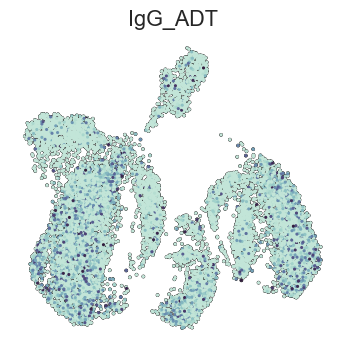

In [1058]:
c=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
s=20

with rc_context({'figure.figsize': (4.2, 4)}):

    ax = sc.pl.umap(rna, size=10, add_outline=True,frameon=False, show=False,outline_width=(0.3, 0.05),)# outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=True, show=False)
    
    sc.pl.umap(s0,color=['IgG_ADT'], legend_loc='none',size=s,
                    cmap=c,vmin=vmin0,vmax=vmax0,colorbar_loc=None, ax=ax,show=False,
              )
    sc.pl.umap(s1,color=['IgG_ADT'], legend_loc='none',size=s,
                 cmap=c,
                    ax=ax,vmin=vmin1, vmax=vmax1,colorbar_loc=None,show=False,
              )
              
    sc.pl.umap(s2,color=['IgG_ADT'], legend_loc='none',size=s,cmap=c,
                    ax=ax,vmin=vmin2, vmax=vmax2,colorbar_loc=None,show=False,
              )

#     plt.savefig('Iggadt.pdf')
    

In [1093]:
G0=s0G.raw.obs_vector('IgG_ADT')
G1=s1G.raw.obs_vector('IgG_ADT')
G2=s2G.raw.obs_vector('IgG_ADT')

In [1094]:



# Generate some data for this demonstration.
data = G0
data1 = G1
data2 = G2

# Fit a normal distribution to the data:
mu, std = norm.fit(data)
mu1, std1 = norm.fit(data1)
mu2, std2 = norm.fit(data2)


Fit results: mu = 4.79,  std = 0.78
Fit results: mu = 3.63,  std = 0.70
Fit results: mu = 5.23,  std = 0.80


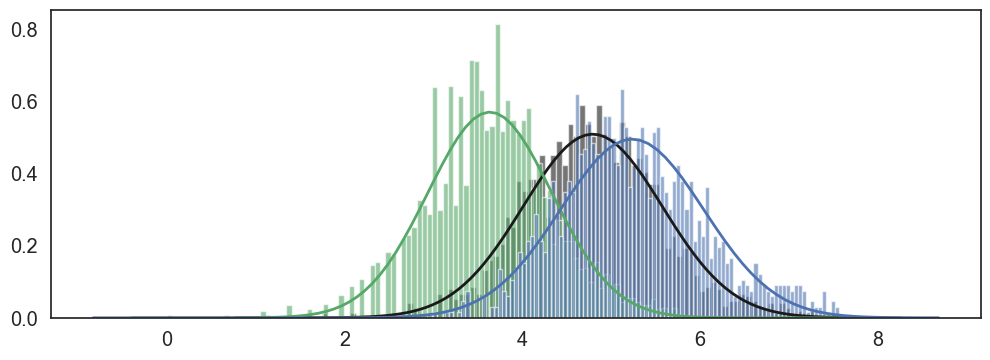

In [1095]:
fig = plt.figure(figsize=(12,4))
# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='k')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
print( "Fit results: mu = %.2f,  std = %.2f" % (mu, std))


plt.hist(data1, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'g', linewidth=2)
print( "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1))

plt.hist(data2, bins=100, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
plt.plot(x, p, 'b', linewidth=2)
print( "Fit results: mu = %.2f,  std = %.2f" % (mu2, std2))


In [978]:
# c0=min((np.quantile(s0M.raw.obs_vector('IgG_ADT'), 0.90), np.quantile(s0A.raw.obs_vector('IgG_ADT'), 0.90)))
# c1=min((np.quantile(s1M.raw.obs_vector('IgG_ADT'), 0.90),np.quantile(s1A.raw.obs_vector('IgG_ADT'), 0.90)))
# c2=min((np.quantile(s2M.raw.obs_vector('IgG_ADT'), 0.90),np.quantile(s2A.raw.obs_vector('IgG_ADT'), 0.90)))
# (c0,c1,c2)

(4.957917881011963, 3.9512436389923096, 5.641551971435547)

In [1096]:
#Upper cutoff
(c0,c1,c2)=(vmin0,vmin1,vmin2)
(c0,c1,c2)

(5.010612964630127, 3.97029185295105, 5.686284732818604)

In [1082]:
#lower cuteoff
c0_=mu+(mu-c0)/std
c1_=mu1+(mu1-c1)/std1
c2_=mu2+(mu2-c2)/std2
(c0_,c1_,c2_)

(4.509797972567184, 3.152641751879678, 4.670469022490362)

In [1114]:
s0h=s0[s0.raw.obs_vector('IgG_ADT')>=c0]
s0n=s0[s0.raw.obs_vector('IgG_ADT')<c0_]
s1h=s1[s1.raw.obs_vector('IgG_ADT')>=c1]
s1n=s1[s1.raw.obs_vector('IgG_ADT')<c1_]
s2h=s2[s2.raw.obs_vector('IgG_ADT')>=c2]
s2n=s2[s2.raw.obs_vector('IgG_ADT')<c2_]

In [1113]:
rna.obs['sec']='x'


In [1115]:
s0h_i=s0h.obs.index
s0n_i=s0n.obs.index
s1h_i=s1h.obs.index
s1n_i=s1n.obs.index
s2h_i=s2h.obs.index
s2n_i=s2n.obs.index


rna.obs.loc[s0h_i,'sec'] ='hi'
rna.obs.loc[s1h_i,'sec'] ='hi'
rna.obs.loc[s2h_i,'sec'] ='hi'
rna.obs.loc[s0n_i,'sec'] ='lo'
rna.obs.loc[s1n_i,'sec'] ='lo'
rna.obs.loc[s2n_i,'sec'] ='lo'


In [ ]:
# fig = plt.figure(figsize=(8,12))

# ax = sns.set(font_scale=1.3) 
# ax = sns.set_style("white")
# # sns.kdeplot( M.obs_vector('IgG_ADT'), #kde=False,
# #    color = 'slategrey',shade=True)
# ax1 = fig.add_subplot(311)

# ax1 = sns.distplot(s0G.raw.obs_vector('IgG_ADT'), kde=True,
#              color = 'Green',bins=100,norm_hist=True,hist=True
#         )#,bins=int(30))
# # sns.kdeplot( A.obs_vector('IgG_ADT'), #kde=False,
# #              color = 'purple',shade=True)
# ax1.set(xlabel=None)
# ax1.set(ylabel=None)
# plt.xlim(1,8)
# plt.ylim(0,0.8)
# # plt.xticks([])
# # plt.yticks([])

# # sns.distplot(samples)
# ax1.plot(x, p*0.5, 'blue', linewidth=2)
# ax1.plot(x, gp*0.5, 'red', linewidth=2)
# # ax1.fill(x, gp*0.5,'red',alpha=0.3)
# ax1.fill_between(x, gp*0.5, 0,color='red',alpha=0.3,where = (x > 5.3 ) )
# ax1.fill_between(x, p*0.5, 0,color='blue',alpha=0.3,where = (x < 4.3 ))

In [1124]:

gcluster=rna[(rna.obs.leiden=="1")|(rna.obs.leiden=="2")|(rna.obs.leiden=="10")|(rna.obs.leiden=="0")|(rna.obs.leiden=="4")]
ngcluster=rna[(rna.obs.leiden=="3")|(rna.obs.leiden=="5")|(rna.obs.leiden=="7")|(rna.obs.leiden=="8")|(rna.obs.leiden=="9")]



/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


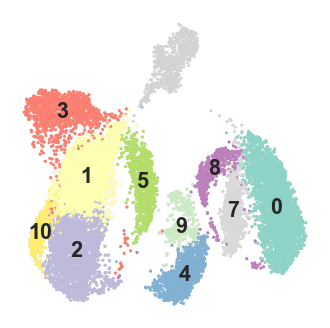

In [1314]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(rna, size=20, show=False)
    sc.pl.umap(asc,color=['leiden'],
      size=20,show=False, alpha=1, legend_loc="on data",
 
         add_outline=False, outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=False, ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
#     plt.savefig('gumap.pdf')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


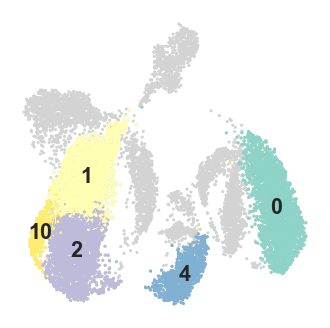

In [1125]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(rna, size=20, show=False)
    sc.pl.umap(gcluster,color=['leiden'],
      size=20,show=False, alpha=1, legend_loc="on data",
 
         add_outline=False, outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=False, ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
#     plt.savefig('gumap.pdf')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


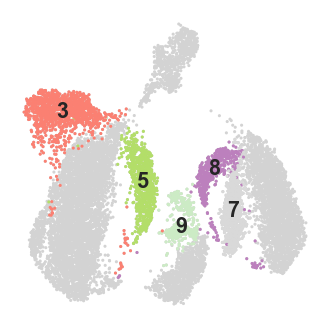

In [1126]:
with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(rna, size=20, show=False)
    sc.pl.umap(ngcluster,color=['leiden'],
      size=20,show=False, alpha=1, legend_loc="on data",
 
         add_outline=False, outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=False, ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
#     plt.savefig('gumap.pdf')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


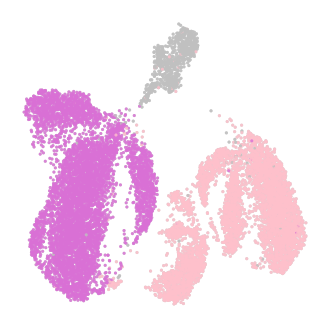

In [1133]:

with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(rna, size=20, show=False)

    sc.pl.umap(rna,color=['IgL'],
      size=20,show=False, alpha=0.8, 
        palette={
        "kappa": "orchid",
        "lambda": "pink",
        'x':'silver'}, 
         add_outline=False, outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=False,
               legend_loc="None", ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
#     plt.savefig('klumap.pdf')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


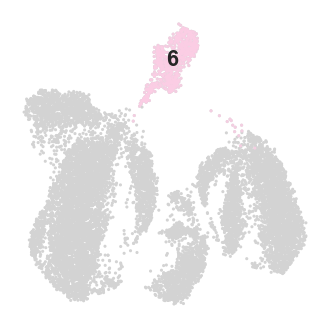

In [1128]:

with rc_context({'figure.figsize': (4, 4)}):
    ax = sc.pl.umap(rna, size=20, show=False)

    sc.pl.umap(c6,color='leiden',
      size=20,show=False, alpha=0.8, 
         add_outline=False, outline_width=(0.2, 0.05), outline_color=('grey', 'white'),frameon=False, 
               legend_loc='on data',ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
#     plt.savefig('klumap.pdf')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


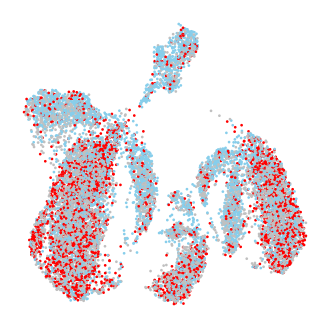

In [1123]:
with rc_context({'figure.figsize': (4, 4)}):

    ax=sc.pl.umap(rna,color='sec', legend_loc='none',size=15,show=False, alpha=1,
               palette= {'hi':'red',
                        'x':'silver',
                        'lo':'skyblue',
                        },
                add_outline=False, outline_width=(0.2, 0.05), outline_color=('silver', 'white'),
               frameon=False
               
     )
    ax.set_title('')

#     plt.savefig('asc_hl.pdf')

In [1184]:
rna[rna.obs['Ig']=='G'].obs


n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGTACTGTC-1-0     3128               3128       21325.0   
AAACCCAGTCCACAGC-1-0     2914               2914       19771.0   
AAACCCATCCCTCTCC-1-0     3021               3021       16684.0   
AAACGAACAACGTATC-1-0     2231               2231       15467.0   
AAACGAACAGACGCTC-1-0     2219               2219       12553.0   
...                       ...                ...           ...   
TTTCATGTCTGCGGCA-1-2     1988               1988       16355.0   
TTTCCTCCACACCTTC-1-2     2014               2014       14104.0   
TTTCCTCGTCTGTGGC-1-2     1509               1509       14251.0   
TTTCGATGTAACATCC-1-2     1846               1846       11623.0   
TTTGATCGTCAAAGTA-1-2     2519               2519       12601.0   

                      total_counts_mt  pct_counts_mt sample leiden Ig     IgL  \
AAACCCAAGTACTGTC-1-0            909.0       4.262603      0      1  G   kappa   
AAACCCAGTCCACAGC-1-0            792.0       4.005867      0      1  G   kappa   
AAACCCATCCCTCTCC-1-0            247.0       1.480460      0      1  G   kappa   
AAACGAACAACGTATC-1-0            288.0       1.862029      0      1  G   kappa   
AAACGAACAGACGCTC-1-0            514.0       4.094639      0      1  G   kappa   
...                               ...            ...    ...    ... ..     ...   
TTTCATGTCTGCGGCA-1-2            498.0       3.044940      2      0  G  lambda   
TTTCCTCCACACCTTC-1-2            230.0       1.630743      2      0  G  lambda   
TTTCCTCGTCTGTGGC-1-2            235.0       1.649007      2      0  G  lambda   
TTTCGATGTAACATCC-1-2            160.0       1.376581      2      4  G  lambda   
TTTGATCGTCAAAGTA-1-2            292.0       2.317276      2      0  G  lambda   

                     IgH sec  
AAACCCAAGTACTGTC-1-0  G1   x  
AAACCCAGTCCACAGC-1-0  G1  hi  
AAACCCATCCCTCTCC-1-0  G1  hi  
AAACGAACAACGTATC-1-0  G1  lo  
AAACGAACAGACGCTC-1-0  G2  lo  
...                   ..  ..  
TTTCATGTCTGCGGCA-1-2  G1  hi  
TTTCCTCCACACCTTC-1-2  G1  lo  
TTTCCTCGTCTGTGGC-1-2  G1  hi  
TTTCGATGTAACATCC-1-2  G1   x  
TTTGATCGTCAAAGTA-1-2  G2  lo  

[8106 rows x 11 columns]

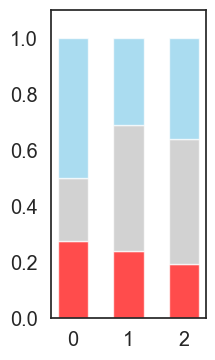

sample         0         1         2
sec                                 
hi      0.272775  0.238578  0.191720
lo      0.502370  0.311243  0.360313
x       0.224855  0.450179  0.447967

In [1186]:
d=rna.obs
dd=d.groupby('sample')['sec'].value_counts(normalize=True).unstack('sample')
al=d['sec'].value_counts(normalize=True)
# dd['G']= al

labels = dd.columns
high= dd.iloc[0]
low =  dd.iloc[1]
grey = dd.iloc[2]

fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()

dd

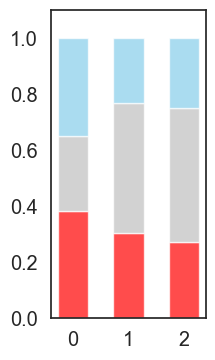

sample         0         1         2
sec                                 
hi      0.382215  0.303311  0.272099
lo      0.352287  0.234313  0.249309
x       0.265498  0.462376  0.478591

In [1187]:
d=rna[rna.obs['Ig']=='G'].obs
dd=d.groupby('sample')['sec'].value_counts(normalize=True).unstack('sample')
al=d['sec'].value_counts(normalize=True)
# dd['G']= al

labels = dd.columns
high = dd.iloc[0]
low =  dd.iloc[1]
grey = dd.iloc[2]

fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()

dd

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


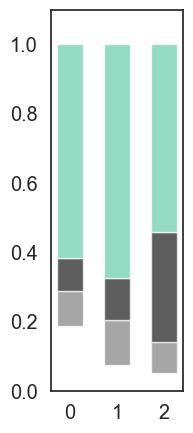

sample         0         1         2
Ig                                  
A       0.098999  0.130048  0.090638
G       0.615850  0.673476  0.540097
M       0.097420  0.121940  0.317792
x       0.187730  0.074536  0.051473

In [217]:
d=rna.obs
dd=d.groupby('sample')['Ig'].value_counts(normalize=True).unstack('sample')
# al=d[''].value_counts(normalize=True)
# dd['G']= al

labels = dd.columns
AB = dd.iloc[3]
A =  dd.iloc[0]
M = dd.iloc[2]
G = dd.iloc[1]


fig = plt.figure(figsize=(2.2,4.6))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, AB, width, label='AB',color='white',alpha=0.7)
ax.bar(labels, A, width, bottom=AB,color='grey',alpha=0.7,
       label='grey area')
ax.bar(labels, M, width, bottom=AB+A,color='k',alpha=0.7,
       label='low IgG')
ax.bar(labels, G, width, bottom=AB+A+M,color='mediumaquamarine',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

plt.savefig('gbar.pdf')
# plt.legend(loc='upper right', bbox_to_anchor=(0.05, 0.05)
# )
plt.show()

dd

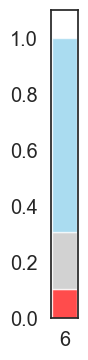

leiden         6
sec             
lo      0.692689
x       0.204461
hi      0.102850

In [1173]:
d=rna[rna.obs.leiden=='6'].obs
dd=d.groupby('leiden')['sec'].value_counts(normalize=True).unstack('leiden')
al=d['sec'].value_counts(normalize=True)
# dd['G']= al

labels = dd.columns
low = dd.iloc[0]
grey =  dd.iloc[1]
high = dd.iloc[2]

fig = plt.figure(figsize=(0.35,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()

dd

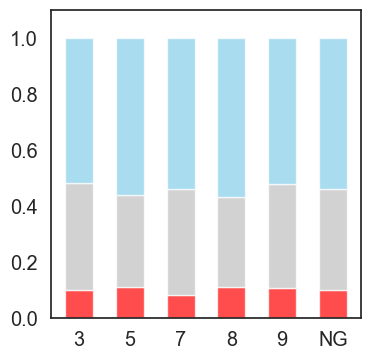

leiden         3         5         7         8         9        NG
sec                                                               
lo      0.517104  0.559809  0.539281  0.567619  0.520725  0.538482
x       0.381862  0.331340  0.378162  0.323810  0.373057  0.360852
hi      0.101034  0.108852  0.082557  0.108571  0.106218  0.100666

In [1141]:
d=ngcluster.obs
dd=d.groupby('leiden')['sec'].value_counts(normalize=True).unstack('leiden')
al=d['sec'].value_counts(normalize=True)
dd['NG']= al

labels = dd.columns
low = dd.iloc[0]

grey = dd.iloc[1]
high =  dd.iloc[2]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)
# plt.savefig('ngbar.pdf')


# plt.legend(loc='upper right')
plt.show()

dd

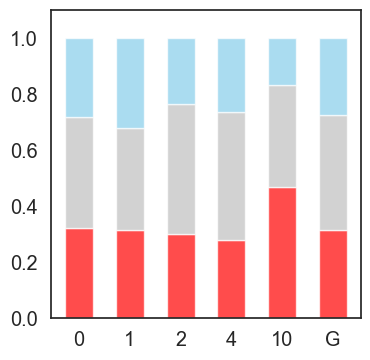

leiden         0         1         2         4        10         G
sec                                                               
hi      0.321932  0.313284  0.299866  0.279094  0.466867  0.314406
lo      0.284105  0.320640  0.236665  0.265705  0.168675  0.274790
x       0.393964  0.366075  0.463469  0.455201  0.364458  0.410804

In [1140]:
d=gcluster.obs
dd=d.groupby('leiden')['sec'].value_counts(normalize=True).unstack('leiden')
al=d['sec'].value_counts(normalize=True)
dd['G']= al

labels = dd.columns
high = dd.iloc[0]
low =  dd.iloc[1]
grey = dd.iloc[2]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()

dd

In [79]:
dd['G'][1]*len(gcluster_)/(len(asc_)+len(ab))

0.14397182167402475

(0.0, 1.1)

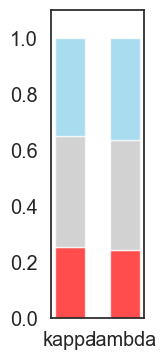

In [1176]:
d=rna.obs
dd=d.groupby('IgL')['sec'].value_counts(normalize=True).unstack('IgL')
al=d['sec'].value_counts(normalize=True)
# dd['al']= al
dd=dd.drop(["x"], axis=1)
labels = dd.columns
# dd=dd.drop["x"]
high = dd.iloc[0]
low =  dd.iloc[1]
grey = dd.iloc[2]

fig = plt.figure(figsize=(1.2,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('kl_dup.pdf')
# plt.legend(loc='upper right')
# plt.show()

In [1177]:
dd

IgL     kappa    lambda
sec                    
hi   0.254092  0.241299
lo   0.349413  0.365043
x    0.396494  0.393658

In [1210]:
gcluster

AnnData object with n_obs × n_vars = 8330 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'Ig_colors', 'IgH_colors', 'IgL_colors', 'dendrogram_leiden', 'sec_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [164]:
rnaG=rna[rna.obs.Ig=='G']
rnaG

View of AnnData object with n_obs × n_vars = 8106 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'IgH_colors', 'IgL_colors', 'Ig_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sec_colors', 'umap', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

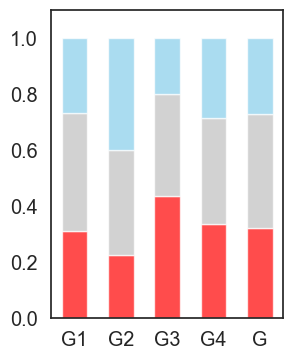

In [1227]:
d=rnaG.obs
dd=d.groupby('IgH')['sec'].value_counts(normalize=True).unstack('IgH')
al=d['sec'].value_counts(normalize=True)

dd['G']= al
labels = dd.columns
# dd=dd.drop["x"]
high = dd.iloc[0]
low =  dd.iloc[1]
grey = dd.iloc[2]

fig = plt.figure(figsize=(3,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, high, width, label='high IgG',color='red',alpha=0.7)
ax.bar(labels, grey, width, bottom=high,color='silver',alpha=0.7,
       label='grey area')
ax.bar(labels, low, width, bottom=high+grey,color='skyblue',alpha=0.7,
       label='low IgG')

plt.ylim(0,1.1)

# plt.savefig('kl_dup.pdf')
# plt.legend(loc='upper right')
plt.show()

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


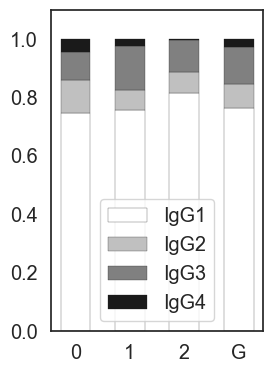

sample         0         1         2         G
IgH                                           
G1      0.745618  0.758277  0.814917  0.764742
G2      0.115434  0.066914  0.071133  0.081668
G3      0.094057  0.150035  0.110497  0.126820
G4      0.044891  0.024774  0.003453  0.026770

In [208]:
d=rnaG.obs
dd=d.groupby('sample')['IgH'].value_counts(normalize=True).unstack('sample')
al=d['IgH'].value_counts(normalize=True)

dd['G']= al
labels = dd.columns
# dd=dd.drop["x"]
tmp1 = dd.iloc[0]
tmp2 =  dd.iloc[1]
tmp3 = dd.iloc[2]
tmp4 = dd.iloc[3]

fig = plt.figure(figsize=(3,4))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, tmp1, width, label='IgG1',color='white',linewidth=0.2,edgecolor='k')
ax.bar(labels, tmp2, width,  label='IgG2',bottom=tmp1,color='silver',linewidth=0.2,edgecolor='k',
)
ax.bar(labels, tmp3, width,  label='IgG3',bottom=tmp1+tmp2,color='grey',linewidth=0.2,edgecolor='k',
)
ax.bar(labels, tmp4, width,  label='IgG4',bottom=tmp1+tmp2+tmp3,color='k',linewidth=0.2,edgecolor='k',
)

plt.ylim(0,1.1)

# plt.savefig('kl_dup.pdf')
# plt.legend(loc='best')
plt.show()
dd

In [53]:
s0=rna[rna.obs['sample']=="0"]
G1_0=s0[s0.obs.IgH=='G1']
G2_0=s0[s0.obs.IgH=='G2']
G3_0=s0[s0.obs.IgH=='G3']
G4_0=s0[s0.obs.IgH=='G4']

In [54]:
s1=rna[rna.obs['sample']=="1"]
G1_1=s1[s1.obs.IgH=='G1']
G2_1=s1[s1.obs.IgH=='G2']
G3_1=s1[s1.obs.IgH=='G3']
G4_1=s1[s1.obs.IgH=='G4']
s1

View of AnnData object with n_obs × n_vars = 6413 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'IgH_colors', 'IgL_colors', 'Ig_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sec_colors', 'umap', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [55]:
s2=rna[rna.obs['sample']=="2"]
G1_2=s2[s2.obs.IgH=='G1']
G2_2=s2[s2.obs.IgH=='G2']
G3_2=s2[s2.obs.IgH=='G3']
G4_2=s2[s2.obs.IgH=='G4']
s2

View of AnnData object with n_obs × n_vars = 2681 × 36691
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'
    uns: 'IgH_colors', 'IgL_colors', 'Ig_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sec_colors', 'umap', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

PearsonRResult(statistic=0.15781406338075069, pvalue=3.4175892867546314e-11)
PearsonRResult(statistic=0.24627273947413367, pvalue=1.918200980482789e-46)
PearsonRResult(statistic=0.252260107425315, pvalue=1.381440325889722e-18)


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


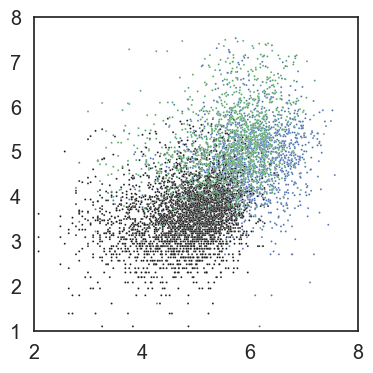

In [140]:
x='IGHG1'
y='IgG_ADT'
ad0=G1_0.raw
ad1=G1_1.raw
ad2=G1_2.raw

df = pd.DataFrame( {'sample':[0]*len(G1_0)+[1]*len(G1_1)+[2]*len(G1_2),
                     x:np.concatenate([(ad0.obs_vector(x)),(ad1.obs_vector(x)),(ad2.obs_vector(x))]),
                    y:np.concatenate([(ad0.obs_vector(y)),(ad1.obs_vector(y)),(ad2.obs_vector(y))])})

# fig, ax = plt.subplots(figsize=(4, 4))
# plt.rcParams["figure.figsize"] = [4, 4]
# plt.rcParams["figure.autolayout"] = True
ax=sns.scatterplot(x=x,y=y,data=df,palette={0:'b',1:'k',2:'g'},s=2,hue='sample',legend=False)
ax.set(xlabel=None)
ax.set(ylabel=None)

print(pearsonr(ad0.obs_vector(x),ad0.obs_vector(y)))
print(pearsonr(ad1.obs_vector(x),ad1.obs_vector(y)))
print(pearsonr(ad2.obs_vector(x),ad2.obs_vector(y)))
plt.xlim(2,8)
plt.ylim(1,8)

plt.show()

PearsonRResult(statistic=0.07891340812266595, pvalue=0.1961216150115808)
PearsonRResult(statistic=0.17977453615971362, pvalue=0.0021552886078410956)
PearsonRResult(statistic=0.19005983557494402, pvalue=0.05448982936806785)


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


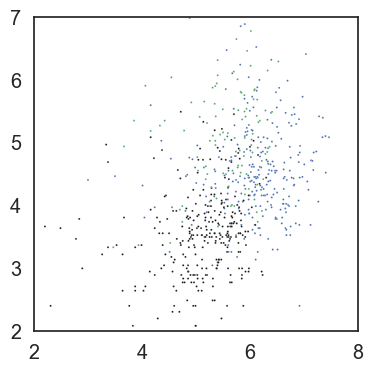

In [141]:
x='IGHG2'
y='IgG_ADT'
ad0=G2_0.raw
ad1=G2_1.raw
ad2=G2_2.raw

df = pd.DataFrame( {'sample':[0]*len(G2_0)+[1]*len(G2_1)+[2]*len(G2_2),
                     x:np.concatenate([(ad0.obs_vector(x)),(ad1.obs_vector(x)),(ad2.obs_vector(x))]),
                    y:np.concatenate([(ad0.obs_vector(y)),(ad1.obs_vector(y)),(ad2.obs_vector(y))])})

# fig, ax = plt.subplots(figsize=(4, 4))
# plt.rcParams["figure.figsize"] = [4, 4]
# plt.rcParams["figure.autolayout"] = True
ax=sns.scatterplot(x=x,y=y,data=df,palette={0:'b',1:'k',2:'g'},s=2,hue='sample',legend=False)

ax.set(xlabel=None)
ax.set(ylabel=None)

print(pearsonr(ad0.obs_vector(x),ad0.obs_vector(y)))
print(pearsonr(ad1.obs_vector(x),ad1.obs_vector(y)))
print(pearsonr(ad2.obs_vector(x),ad2.obs_vector(y)))
plt.xlim(2,8)
plt.ylim(2,7)

plt.show()

PearsonRResult(statistic=0.1670559301341242, pvalue=0.013094637974563826)
PearsonRResult(statistic=0.3107217640703392, pvalue=5.695913201223732e-16)
PearsonRResult(statistic=0.1908225704337958, pvalue=0.01564627955763808)


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


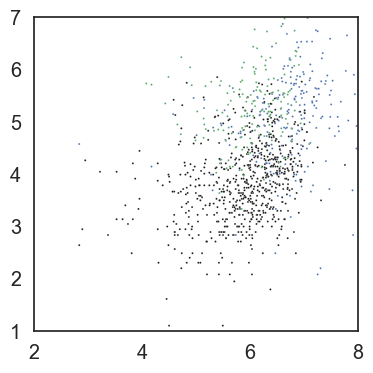

In [142]:
x='IGHG3'
y='IgG_ADT'
ad0=G3_0.raw
ad1=G3_1.raw
ad2=G3_2.raw

df = pd.DataFrame( {'sample':[0]*len(G3_0)+[1]*len(G3_1)+[2]*len(G3_2),
                     x:np.concatenate([(ad0.obs_vector(x)),(ad1.obs_vector(x)),(ad2.obs_vector(x))]),
                    y:np.concatenate([(ad0.obs_vector(y)),(ad1.obs_vector(y)),(ad2.obs_vector(y))])})

# fig, ax = plt.subplots(figsize=(4, 4))
# plt.rcParams["figure.figsize"] = [4, 4]
# plt.rcParams["figure.autolayout"] = True
ax=sns.scatterplot(x=x,y=y,data=df,palette={0:'b',1:'k',2:'g'},s=2,hue='sample',legend=False)

ax.set(xlabel=None)
ax.set(ylabel=None)

print(pearsonr(ad0.obs_vector(x),ad0.obs_vector(y)))
print(pearsonr(ad1.obs_vector(x),ad1.obs_vector(y)))
print(pearsonr(ad2.obs_vector(x),ad2.obs_vector(y)))
plt.xlim(2,8)
plt.ylim(1,7)

plt.show()

PearsonRResult(statistic=0.057068602076660355, pvalue=0.563094911893992)
PearsonRResult(statistic=0.29641721812716443, pvalue=0.0019343293786421311)
PearsonRResult(statistic=0.27670079208612725, pvalue=0.6522423311731179)


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


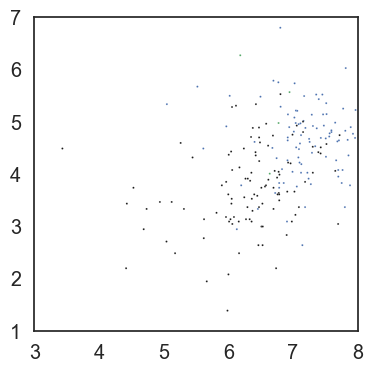

In [143]:
x='IGHG4'
y='IgG_ADT'
ad0=G4_0.raw
ad1=G4_1.raw
ad2=G4_2.raw

df = pd.DataFrame( {'sample':[0]*len(G4_0)+[1]*len(G4_1)+[2]*len(G4_2),
                     x:np.concatenate([(ad0.obs_vector(x)),(ad1.obs_vector(x)),(ad2.obs_vector(x))]),
                    y:np.concatenate([(ad0.obs_vector(y)),(ad1.obs_vector(y)),(ad2.obs_vector(y))])})

# fig, ax = plt.subplots(figsize=(4, 4))
# plt.rcParams["figure.figsize"] = [4, 4]
# plt.rcParams["figure.autolayout"] = True
ax=sns.scatterplot(x=x,y=y,data=df,palette={0:'b',1:'k',2:'g'},s=2,hue='sample',legend=False)

ax.set(xlabel=None)
ax.set(ylabel=None)

print(pearsonr(ad0.obs_vector(x),ad0.obs_vector(y)))
print(pearsonr(ad1.obs_vector(x),ad1.obs_vector(y)))
print(pearsonr(ad2.obs_vector(x),ad2.obs_vector(y)))
plt.xlim(3,8)
plt.ylim(1,7)

plt.show()

In [1492]:
rna.write('rna_analyzed.h5')


In [5]:
rna=sc.read('rna_analyzed.h5')
